#  Predicting sales based on advertising dollars

In [35]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/Advertising.csv', index_col=0)

data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
data.shape

(200, 4)

#### Features:
* TV: Advertising dollars spent on TV for a single product in a given market
* Radio: Advertising dollars spent on Radio
* Newspaper: Advertising dollars spent on Newspaper

#### Respose:
* Sales: Sales of a single product in a given market

Since the response is a continous variable, this is a **Regression** porblem.

### Visualizing relations between features and response

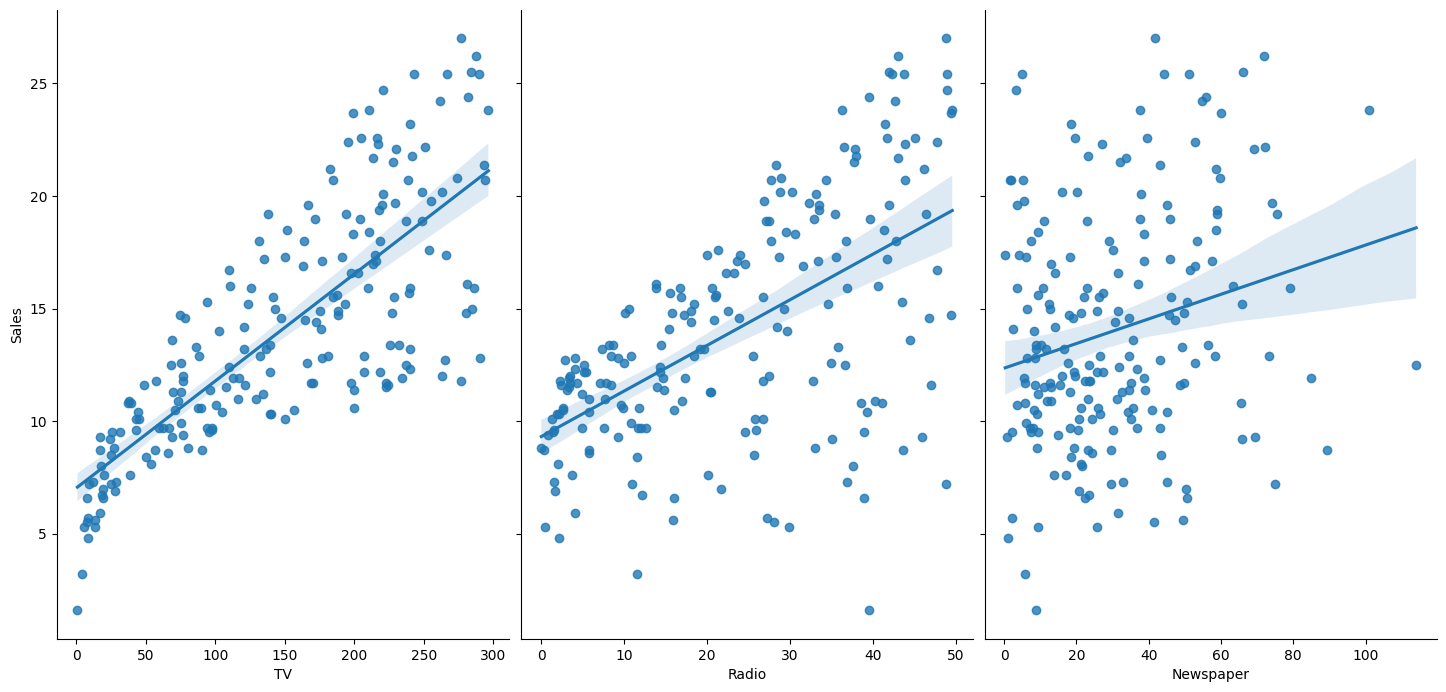

In [11]:
import seaborn as sns

sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

TV has a strong linear realtion with sales while Radio has a less strong relation and Newspaper has weak relation.

### Preparing X and y using pandas 

In [14]:
X = data[['TV', 'Radio', 'Newspaper']]

X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [19]:
X.shape

(200, 3)

In [17]:
y = data['Sales']

y.shape

(200,)

In [18]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

### Train/Test split

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [24]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


### Linear Regression Model

In [25]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

#### Interpreting model coefficients

In [26]:
# printing the intercept and coefficients

print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [33]:
# paie the feature names with the coefficients
feature_cols = ['TV', 'Radio', 'Newspaper']
coef = zip(feature_cols, linreg.coef_)
for i in coef:
    print(i)

('TV', 0.046564567874150295)
('Radio', 0.1791581224508883)
('Newspaper', 0.0034504647111804065)


            y = 2.88 + (0.046 x TV) + (0.179 x Radio) + (0.00345 x Newspaper)
* For a given amount of Radio and Newspaper ad spenging, a **unit** increase in TV ad spending is **assosicated** with a 0.046 unit increase in Sales.
* This is a statement of association, not **causation**.

#### Making predictions

In [34]:
y_pred = linreg.predict(X_test)

### Model Evaluation with RMSE

In [41]:
from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.404651423032896


### Feature Selection

Since 'Newspaper' has weak relation with Sales, let's remove it from the model.

In [43]:
X = data[['TV', 'Radio']]
y = data.Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model with training data
linreg.fit(X_train, y_train)

# making predictions
y_pred = linreg.predict(X_test)

# computing RMSE

print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.3879034699382888


**RMSE** decreased which indicates that Newspaper feature is not useful for predicting Sales and should be removed from the model 